## <div style="text-align: right"> Mayank Pathak </div>
# Problem Set 3
## Question 1 
### Classifying Flower Dataset 

### October 20, 2018

- 1. **Introduction** 
    - 1.1 Importing Necessary libraries
    - 1.2 Defining Hyper-Parameters
- 2. **Data Preparation**
    - 2.1  Load Data
    - 2.2  Reshaping Input Images
    - 2.3  Normalize Images 
    - 2.4  Show Sample Training Images and Labels
- 3. **Neural Network**
    - 3.1 Define Activation Function 
    - 3.2 Define the Model
    - 3.3 Set the optimizer
    - 3.4 Fit the Training Data
- 4. **Evaluate Model**
    - 4.1 Evaluate the metwork with test data
    - 4.2 Plot Accuracy and Loss curves
    - 4.3 Plot Confusion Matrix

### 1. Introduction

#### 1.1 Importing necessary libraries:
Libraries used for to create this network:
    1. numpy
    2. matplotlib
    3. torch
    4. torch vision
    5. os

In [1]:
import os
import numpy as np
import torch
import torch.nn as nn
from torch import optim
from torch import autograd
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch.utils.data as Data
from torch.autograd import variable
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split

%matplotlib inline

#### 1.2 Defining Hyper-Parameters and other required Parameters
The Hyper-Parameters for this model are:

    1. input size
    2. batch size
    3. number of classes
    4. optimizer
    5. epochs
    6. pool size
    7. learning rate

In [2]:
input_size = 32
# hidden_size1 = 64
# hidden_size2 = 64
num_classes = 5 # numnber of outputs we want
num_epochs = 20
batch_size = 5
learning_rate  = 0.001
img_rows, img_cols = 32, 32

### 2. Data Preparation

#### 2.1 Load Data
The input images and labels are loaded using 'np.load' function to load the '.npy' files provided with the homework assignment. <br>

> Number of Input Images: 4323 <br>

In [3]:
input_images  = np.load('Flowers/flower_imgs.npy')
input_labels = np.load('Flowers/flower_labels.npy')


# Splitting the input data into training and testing data
train_images, test_images, train_labels, test_labels = train_test_split(input_images, input_labels, test_size=0.20)


In [4]:
train_images.shape

(3458, 32, 32, 3)

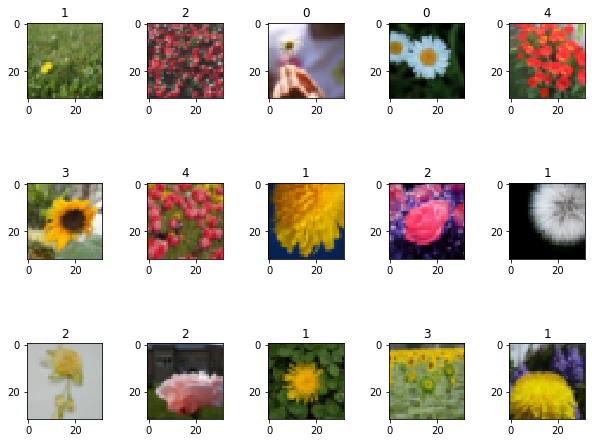

In [5]:
plt.figure(figsize=(10,8))
plt.subplots_adjust(wspace=0.6, hspace=0.4)
# figure
x, y = 5, 3
for i in range(x*y):  
    plt.subplot(y, x, i+1)
    plt.imshow(train_images[i], interpolation='nearest')
    plt.title(train_labels[i])   
plt.show()

#### 2.2 Reshaping Input Images
Input images are reshaped to put channels at the end. <br>
The shape now is:
> TrainImages shape: (3112,32,32,3) <br>
> TestImages shape: (865,32,32,3)

#### 2.3 Normalizing Image
Then, the image type is converted to float32 from uint8 to increase precision and image pixel values are normalized w.r.t. 255, i.e. the maximum pixel intensity.

In [6]:
# train_images = train_images.reshape(train_images.shape[0], 3, img_rows, img_cols)
# test_images = test_images.reshape(test_images.shape[0], 3, img_rows, img_cols)
# # input_shape = (3, img_rows, img_cols)

#Define transformations for the training set, flip the images randomly, crop out and apply mean and std normalization
train_transformations = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])

# converting the type of image from unit8 to float32
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# Normalizing the input images to make the pixel values between 0 and 1.
train_images /= 255
test_images /= 255

# Splitting the training data into validation and training data
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.10)

In [7]:
train_images.shape
# type(train_images)

(3112, 32, 32, 3)

In [8]:
# plt.figure(figsize=(10,8))
# plt.subplots_adjust(wspace=0.6, hspace=0.4)
# # figure
# x, y = 5, 3
# for i in range(x*y):  
#     plt.subplot(y, x, i+1)
#     plt.imshow(val_images[i], interpolation='nearest')
#     plt.title(val_labels[i])   
# plt.show()

#### Converting the data input (images and labels) from numpy to tensors and wrapping them together.

In [9]:
# Wrapping data tensors and target tensors for train images
train_dataset = Data.TensorDataset(
                data_tensor = torch.from_numpy(train_images).float(),
                target_tensor = torch.from_numpy(train_labels).long()) #, transforms = train_transformations)
# train_dataset = train_dataset(transforms = train_transformations)

# Wrapping data tensors and target tensors for test images
val_dataset = Data.TensorDataset(
                data_tensor = torch.from_numpy(val_images).float(),
                target_tensor = torch.from_numpy(val_labels).long())

# Wrapping data tensors and target tensors for test images
test_dataset = Data.TensorDataset(
                data_tensor = torch.from_numpy(test_images).float(),
                target_tensor = torch.from_numpy(test_labels).long())

In [10]:
type(data_tensor)

NameError: name 'data_tensor' is not defined

In [11]:
class ImgLoader(Data.Dataset):
    def __init__(self, x, y):
        self.X = np.array(x, dtype = np.float32)
        self.y = np.array(y, dtype = np.long)
#         self.cuda = iscuda
    
    def __getitem__(self, index):
        x_val = self.X[index]
        x_val = torch.from_numpy(x_val).permute(2, 1, 0)
        y_val = torch.from_numpy(np.array([self.y[index]]))
#         if self.cuda:
#             x_val = x_val.cuda()
#             y_val = y_val.cuda()
        return x_val, y_val

    def __len__(self):
        return len(self.X)

In [12]:
type(x_val_)

NameError: name 'x_val_' is not defined

#### Creating Data loader for loading the dataset created above. 
Three different dataloader are used, each for training, validation and testing respectively.

In [ ]:
# train_dataset = ImgLoader(train_images,train_labels)
# val_dataset = ImgLoader(val_images,val_labels)
# test_dataset = ImgLoader(test_images, test_labels)

train_loader = Data.DataLoader(dataset = train_dataset,
                                           batch_size = batch_size,
                                           shuffle = True) #, num_workers = 4)

val_loader = Data.DataLoader(dataset = val_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)

test_loader = Data.DataLoader(dataset = test_dataset,
                                           batch_size = batch_size,
                                           shuffle = False)


Steps
1. Data
2. Model 
3. Loss
4. Optimizer
5. Train Loop

In [ ]:
class ConvNetwork(nn.Module):
    
    def __init__(self, num_classes):
        
        super(ConvNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(num_features= 12)
        self.relu1 = nn.ReLU()

        self.conv2 = nn.Conv2d(in_channels=12, out_channels=12, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(num_features= 12)
        self.relu2 = nn.ReLU()

        self.pool = nn.MaxPool2d(kernel_size=2)

        self.conv3 = nn.Conv2d(in_channels=12, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(num_features= 24)
        self.relu3 = nn.ReLU()

        self.conv4 = nn.Conv2d(in_channels=24, out_channels=24, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(num_features= 24)
        self.relu4 = nn.ReLU()

        self.fc = nn.Linear(in_features=16 * 16 * 24, out_features=num_classes)

    def forward(self, x):
        output = self.conv1(x)
        output = self.bn1(output)
        output = self.relu1(output)

        output = self.conv2(output)
        output = self.bn2(output)
        output = self.relu2(output)

        output = self.pool(output)

        output = self.conv3(output)
        output = self.bn3(output)
        output = self.relu3(output)

        output = self.conv4(output)
        output = self.bn4(output)
        output = self.relu4(output)

        output = output.view(-1, 16 * 16 * 24)

        output = self.fc(output)

        return output

In [ ]:
## To save model

# def save_models(epoch):
#     torch.save(model.state_dict(), "cifar10model_{}.model".format(epoch))
#     print("Chekcpoint saved")

In [ ]:
model = ConvNetwork(num_classes)
# model = ConvNetwork(num_classes)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate) #, weight_decay = 0.0001)



def test():
    model.eval()
    test_acc = 0.0
    for i, (images, labels) in enumerate(val_loader):

        # Predict classes using images from the test set
        images = variable.Variable(images)
        outputs = model(images)
        _, prediction = torch.max(outputs.data, 1)
        
        test_acc += torch.sum(prediction == labels.data)

    # Compute the average acc and loss over all 4323 test images
    test_acc = test_acc / 4323

    return test_acc

In [ ]:
def train(num_epochs):
    best_model_wts = model.state_dict()
    best_train_acc = 0.0
    best_val_acc = 0.0
    model.train(True)
    for epoch in range(num_epochs):
        print( 'Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-'*10)
        
#         train_acc = 0.0
#         train_loss = 0.0
        running_loss = 0.0
        running_corrects = 0
        for data in train_loader:
            inputs, label = data
            inputs, labels = variable.Variable(inputs), variable.Variable(label)
            
            optimizer.zero_grad()
            outputs = model(inputs)
            _, preds = torch.max(outputs.data, 1)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.data[0]
            running_corrects = torch.sum(preds == label)
            

In [ ]:
def train(num_epochs):
    best_model_wts = model.state_dict()
    best_train_acc = 0.0
    best_val_acc = 0.0
    model.train(True)
    for epoch in range(num_epochs):
        print( 'Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-'*10)
        
        train_acc = 0.0
        train_loss = 0.0

        for i, (images, labels) in enumerate(train_loader):
            
            #Clear all accumulated gradients
            optimizer.zero_grad()
            #Predict classes using images from the test set
            images = variable.Variable(images)
#             labels = variable.Variable(labels)
            outputs = model(images)
            type(outputs)
            #Compute the loss based on the predictions and actual labels
            loss = loss_fn(outputs,labels)
            #Backpropagate the loss
            loss.backward()

            #Adjust parameters according to the computed gradients
            optimizer.step()

            train_loss += loss.data[0] * images.size(0)
            _, prediction = torch.max(outputs.data, 1)
            
            train_acc += torch.sum(prediction == labels.data)

        # Call the learning rate adjustment function
#         adjust_learning_rate(epoch)

        # Compute the average acc and loss over all 3112 training images
        train_acc = train_acc / 3112
        train_loss = train_loss / 3112

        # Evaluate on the test set
        test_acc = test()

        # Save the model if the test acc is greater than our current best
#         if test_acc > best_acc:
#             save_models(epoch)
#             best_acc = test_acc

        # Print the metrics
        print("Epoch {}, Train Accuracy: {} , TrainLoss: {} , Test Accuracy: {}".format(epoch, train_acc, train_loss,))
                        

In [ ]:
if __name__ == "__main__":
        train(num_epochs)

In [ ]:
# class ConvNetwork(nn.Module):
    
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(67, 128)
#         self.relu1 = nn.ReLU()
#         self.dout = nn.Dropout(0.2)
       
#         self.fc2 = nn.Linear(128, 64)
#         self.prelu = nn.PReLU(1)
#         self.out = nn.Linear(64, 1)
#         self.out_act = nn.Sigmoid()
        
#     def forward(self, input_):
#         inp = self.fc1(input_)
#         x = self.relu1(inp)
#         x = self.dout(x)
      
#         x = self.fc2(x)
#         x = self.prelu(x)
#         x = self.out(x)
#         y = self.out_act(x)
#         return y

In [ ]:
# def eval(model):
#     model.train(False)
#     count = 0
#     for x,y in zip(x_test,y_test):
#         x = torch.from_numpy(np.array([x])).permute(0, 3, 1, 2)
#         x = x.type(torch.FloatTensor)
        
#         out = model(Variable(x))
# #         print(out.shape)
#         label = np.argmax(out.data.cpu().numpy()) # needs to be optimized
#         if y == label:
#             count += 1
#     print(count * 1.0 / len(x_test))
    
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(params=model.parameters(), lr=0.003)
# # net = ConvClassifier()


# for epoch in range(num_epochs):
#     losses = []
#     model.train(True)
#     for i ,(x, y) in enumerate(train_loader):
        
#         optimizer.zero_grad()
#         inputs =  variable.Variable(x)
#         output = model(inputs)
#         targets = Variable(y.squeeze(1))
#         targets = targets.type(torch.LongTensor)

#         loss = criterion(output, targets)
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.data[0])
#         if (epoch+1) % 1 == 0:
#             print('\nEpoch %d \nLoss %.4f  ' % (epoch+1, np.average(losses)))
#             print('\ntest accuracy')
#             eval(net)
        
        

In [ ]:
# def train_model(model, criterion, optimizer, num_epochs):
#     best_model_wts = model.state_dict()
#     best_val_acc = 0.00
#     best_train_acc = 0.00
# # creating object of the network class
# model = ConvNetwork()

# # defining Loss
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(params = model.parameters(), lr = learning_rate)
    

In [ ]:
# for param in model.parameters():
#    print(type(param.data), param.size())

In [ ]:
# # Train Step
# model.train()
# for epoch in range(num_epochs):
#     losses = []
#     for x,y in train_loader:
# #         img,label = x
#         inputs = variable.Variable(x)
#         labels = variable.Variable(y)
        
#         optimizer.zero_grad()
#         label_ = model(inputs)
#         loss = criterion(label_, label)
#         loss.backward(loss)
#         optimizer.step()

In [ ]:
# # Evaluate step
# model.eval()
# with torch.no_grad():
    

In [ ]:
# # Make a dictionary defining training and validation sets

# dataloaders = dict()
# dataloaders['train'] = train_loader
# dataloaders['val'] = val_loader
# dataloaders['test'] = test_loader




